<a href="https://colab.research.google.com/github/MAOK-Yongsuk/One-Project-per-week-Challenge/blob/main/Week03/BasicAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Data preprocessing

In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train[0][:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1],
       [  0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0],
       [  0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123],
       [  0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156],
       [  0,   0,   0,   0,   1,   0,  69, 207, 223, 218, 216, 216, 163],
       [  0,   0,   1,   1,   1,   0, 200, 232, 232, 233, 229, 223, 223],
       [  0,   0,   0,   0,   0,   0, 183, 225, 216, 223, 228, 235, 227],
       [  0,   0,   0,   0,   0,   0, 193, 228, 218, 213, 198, 180, 212],
       [  0,   0,   1,   3,   0,  12, 219, 220, 212, 218, 192, 169, 227],
       [  0,   0,   0,   6,   0,  99, 244, 222, 220, 218, 203, 198, 221],
       [  0,   0,   4,   0,   0,  55, 

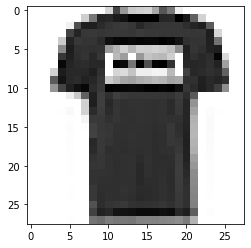

In [9]:
img = X_train[1]
plt.imshow(img, cmap=plt.cm.gray_r)
plt.show()

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

## Model

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras import Model, Sequential

encoding_dim = 36

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.encoding_dim = encoding_dim

    self.encoder = Sequential([
        # InputLayer(input_shape=(28,28)),
        Flatten(),
        Dense(encoding_dim, activation = 'relu'),
    ])

    self.decoder = Sequential ([
        Dense(784, activation = 'sigmoid'),
        Reshape((28,28)),
    ]) 


  def call(self, x):
    encoded = self.encoder(x)  
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(encoding_dim)   

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256,validation_data=(X_test, X_test))

Epoch 1/20
235/235 [==============================] - 4s 14ms/step - loss: 0.4159 - val_loss: 0.3446
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3283 - val_loss: 0.3189
Epoch 3/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3110 - val_loss: 0.3078
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3020 - val_loss: 0.3006
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.2953 - val_loss: 0.2950
Epoch 6/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2909 - val_loss: 0.2916
Epoch 7/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2883 - val_loss: 0.2897
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.2866 - val_loss: 0.2881
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.2854 - val_loss: 0.2872
Epoch 10/20
235/235 [==============================] - 4s 18ms/step - loss: 0.2846 - val_lo

In [12]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 36)                28260     
                                                                 
Total params: 28,260
Trainable params: 28,260
Non-trainable params: 0
_________________________________________________________________


In [13]:
autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               29008     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 29,008
Trainable params: 29,008
Non-trainable params: 0
_________________________________________________________________


## Prediction

In [14]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
print(encoded_imgs.shape)

(10000, 36)


In [16]:
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
decoded_imgs.shape

(10000, 28, 28)

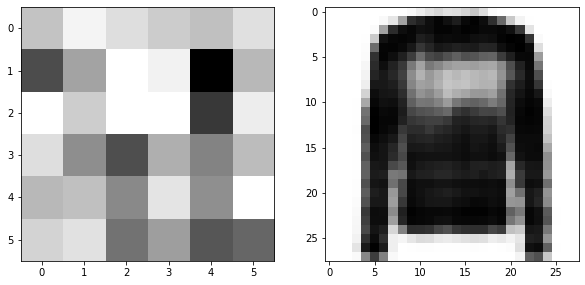

In [32]:
img_index = 1

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(encoded_imgs[img_index].reshape(6,6), cmap=plt.cm.gray_r)
fig.add_subplot(1, 2, 2)
plt.imshow(decoded_imgs[img_index], cmap=plt.cm.gray_r)
plt.show()